In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
# Assuming the dataset is in a CSV file
Raw_data = pd.read_csv('fifa_players.csv')

Clean_data = Raw_data.drop(["name","full_name","weak_foot(1-5)","overall_rating","skill_moves(1-5)","birth_date","age","height_cm","weight_kgs","nationality","potential","value_euro","wage_euro","international_reputation(1-5)","national_team_position","preferred_foot","body_type","release_clause_euro","national_team","national_rating","national_jersey_number"], axis=1) #Deleting raw data


# Remove goalkeepers from the dataset
Clean_data = Clean_data[~Clean_data['positions'].str.contains('GK', na=False)]

# Display the Clean_data DataFrame
Clean_data.to_csv('clean_fifa_players.csv', index=False)

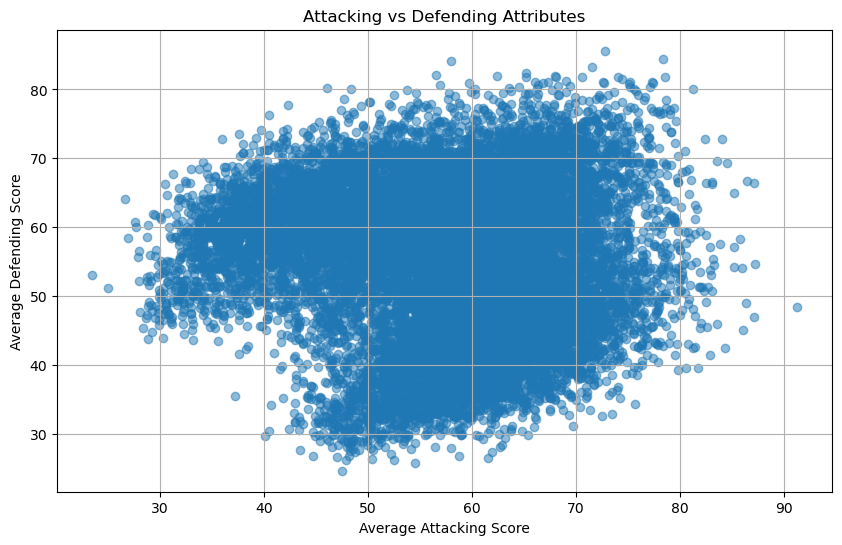

In [38]:
import matplotlib.pyplot as plt

# Define attacking and defending attributes
attacking_attributes = ['crossing', 'finishing', 'short_passing', 'volleys', 'dribbling', 'curve', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'shot_power', 'long_shots', 'vision']
defending_attributes = ['heading_accuracy', 'strength', 'aggression', 'interceptions', 'marking', 'standing_tackle', 'sliding_tackle', 'positioning']

# Calculate average attacking and defending scores for each player
Clean_data['attacking_score'] = Clean_data[attacking_attributes].mean(axis=1)
Clean_data['defending_score'] = Clean_data[defending_attributes].mean(axis=1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(Clean_data['attacking_score'], Clean_data['defending_score'], alpha=0.5)
plt.title('Attacking vs Defending Attributes')
plt.xlabel('Average Attacking Score')
plt.ylabel('Average Defending Score')
plt.grid(True)
plt.show()

In [ ]:
cntDiag = Clean_data["diagnosis"].value_counts()
propDiag = Clean_data["diagnosis"].value_counts(normalize=True)
cntDiag

KeyError: 'diagnosis'

Accuracy: 0.9966435913572478

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2286
           1       1.00      1.00      1.00      2481

    accuracy                           1.00      4767
   macro avg       1.00      1.00      1.00      4767
weighted avg       1.00      1.00      1.00      4767



c:\Users\markh\.conda\envs\Minor\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


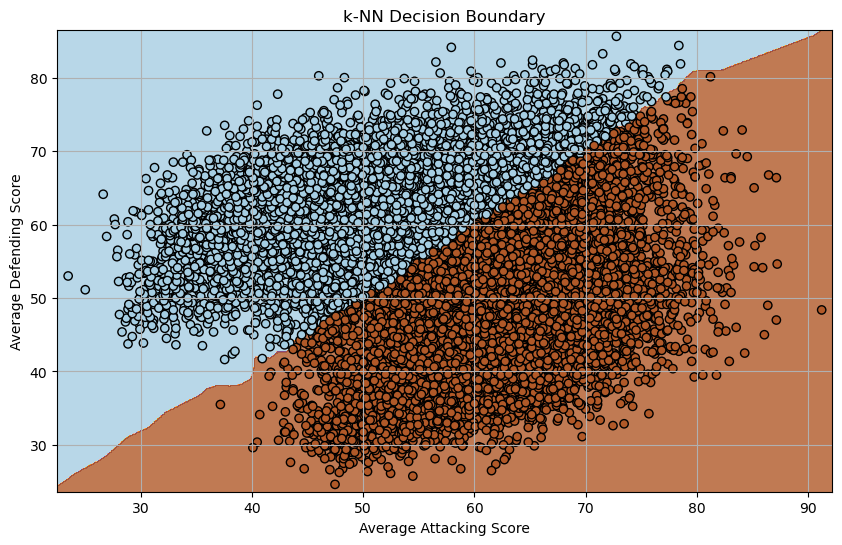

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the target variable: 1 for attacking, 0 for defending
Clean_data['player_type'] = (Clean_data['attacking_score'] > Clean_data['defending_score']).astype(int)

# Prepare features and target
X = Clean_data[['attacking_score', 'defending_score']]
y = Clean_data['player_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision boundary (optional)
import numpy as np

plt.figure(figsize=(10, 6))
x_min, x_max = X['attacking_score'].min() - 1, X['attacking_score'].max() + 1
y_min, y_max = X['defending_score'].min() - 1, X['defending_score'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X['attacking_score'], X['defending_score'], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title('k-NN Decision Boundary')
plt.xlabel('Average Attacking Score')
plt.ylabel('Average Defending Score')
plt.grid(True)
plt.show()